***
# <center>R2.07 - Graphes <br>TP5 - Coloration <center>
***

_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_
***


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

## 0 - Introduction

Le but de ce TP est d'implémenter la coloration naïve de graphe, puis de voir ses limites.

Nous vous fournissons la fonction suivante, qui renvoie la liste des voisin d'un sommet `v` du graphe de matrice d'adjacence `A`.

In [7]:
def neighbours(A,v):
    """
     Return the array of (out-)neighbours of v in the graph whose adjacency matrix is A

    :param A: the adjacency matrix
    :type A: a two dimensional square numpy array containing only integers
    :param v: the considered vertex
    :type v: integer
    :return:  the array of (out-)neighbours of v in the graph whose adjacency matrix is A
    :rtype:  an array of integer
    """
        

    return np.where(A[v]==1)[0]

## 1 - Implémentation de la coloration naïve


> <font color=darkorange> **_Question 1 :_** </font>
> Écrire une fonction `MinCol` renvoyant le minimum des éléments d'une liste triée `col` parmi les éléments n'appartenant pas à la liste `colneigh`.

In [8]:
def MinCol(col,colneigh):
    """
     Return the minimum among col of element which do not belong to colneigh

    :param col,colneigh: colours
    :type col,colneigh: 2 one dimensional np array of int
    :return c:  minimal admissible colour
    :rtype:   int
    """
    i=0
      
    
    while True:
        
        if not col[i] in colneigh: 
            return col[i]
        i=i+1

        
print(MinCol(np.arange(10),np.array([0,1,2])))

print(MinCol(np.arange(10),np.array([1,2])))

print(MinCol(np.arange(10),np.array([0,2])))

3
0
1


> <font color=darkorange> **_Question 2 :_** </font>
> Implémenter l'algorithme `NaiveCol` de coloration naïve de graphes, prenant en entrée une matrice d'adjacence et renvoyant la liste des couleurs des sommets du graphe.

In [ ]:
def NaiveCol(A):
    """
     Return a (naive, possibly sub-optimal) graph colouring of A

    :param A: adjacency matrix
    :type A: a two dimensional square numpy array 
    :return C:  array of colors
    :rtype:   one dimensional numpy array
    """
            
    colours = np.arange(A.shape[0])

    C=-1*np.ones(A.shape[0],int) #colours array
    
    VerticesList = np.arange(A.shape[0])
    np.random.shuffle( VerticesList)
                              
    for i in  VerticesList:            
        neigh=neighbours(A,i)
        colneigh=C[neigh]

        C[i]=MinCol(colours,colneigh)
    
    return C


On teste avec un exemple simple, le cycle.

In [9]:
n=20
G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G))



NameError: name 'C' is not defined

In [5]:

G=nx.generators.petersen_graph()

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw_shell(G,node_color=C, nlist=[range(5,10), range(5)],with_labels=True)


NameError: name 'C' is not defined

> <font color=darkorange> **_Question 3 :_** </font>
> Tester avec au moins un autre exemple classique venant [du manuel de référence networkx](https://networkx.org/documentation/stable/reference/generators.html)

In [10]:
#TODO
#cmap = plt.cm.nipy_spectral

cmap = plt.cm.tab20c

n=20
G=nx.generators.classic.complete_graph(n)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(n),node_color=C,with_labels=True,pos=nx.circular_layout(G),cmap=cmap)

vmin=C.min()
vmax=C.max()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm)
plt.show()

NameError: name 'C' is not defined

In [ ]:

G=nx.generators.petersen_graph()

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw_shell(G,node_color=C, nlist=[range(5,10), range(5)],with_labels=True)


[6 5 2 8 9 0 1 7 3 4]
[1 0 0 0 0 0 0 0 0 0]


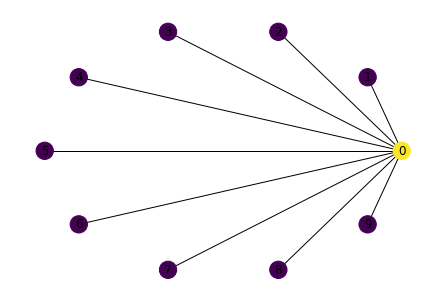

In [7]:
#TODO

n=10
G=nx.generators.classic.star_graph(n-1)

A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G,node_color=C,with_labels=True,pos=nx.circular_layout(G))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
[10]
[ 3 24  2  5 10  4 14 27  7  1  0  8 25 23 20 29  9 16  6 31 18 26 19 15
 28 30 22 13 12 21 11 17]
[2 0 1 0 1 0 2 0 1 0 0 2 1 0 0 1 0 1 1 2 1 0 0 1 0 0 0 0 1 1 1 0]


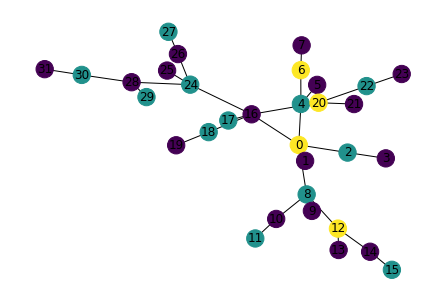

In [8]:
#TODO

n=5
G=nx.generators.binomial_tree(n)

A=nx.to_numpy_array(G)
print(A)
print(neighbours(A,12))
C=NaiveCol(A)
print(C)

nx.draw(G,node_color=C,with_labels=True,pos=nx.spring_layout(G))

## 2 - Analyse de performance de la coloration naïve

Le but de la question suivante est d'estimer la qualité de algorithme de coloration naïve.

On se concentre dans un premier temps sur un cas particulier, le $2n$-cycle.


> <font color=darkorange> **_Question 4 :_** </font>
> En complétant la cellule suivante, écrire une fonction prenant en entrée $n$ (la taille du cycle) et $t$ (le nombre de coloriages naïfs à tester). La fonction doit tester $t$ coloriages naïfs sur $C_{2n}$, et retourne la liste `cols` du nombre de couleurs différentes utilisées pour chaque coloriage.



In [15]:
n=20
t=10000
col_count=np.zeros(n,int)

cols=np.zeros(t,int)

G=nx.generators.classic.cycle_graph(n)

A=nx.to_numpy_array(G)

for i in range(t):
    
    C=NaiveCol(A)
    c_max=max(C)+1
    col_count[c_max]+=1
    cols[i]=c_max


print(f'the colouring is optimal in {cols[2]/t:.5f} percent of the cases')

plt.hist(cols,bins=np.arange(1,n+1))



IndentationError: expected an indented block after 'for' statement on line 11 (2565023244.py, line 15)

> <font color=darkorange> **_Question 5 :_** </font>
>Comprendre et commenter le code suivant.

In [16]:
M=50
col_n=np.zeros(M)
t=5000

#a bit long ~3 minutes


for nn in range(M):
    n=2*(nn+1)
    col_count=np.zeros(n+1,int)
    G=nx.generators.classic.cycle_graph(n)
    A=nx.to_numpy_array(G)
    
    
    print("treating cycle graph of size", n)
    
    
    for i in range(t):
        C=NaiveCol(A)
        c_max=max(C)+1
        col_count[c_max]+=1
    col_n[nn]=col_count[2]/t
    print(col_count)
    print(col_n[nn])

treating cycle graph of size 2


NameError: name 'C' is not defined

> <font color=darkorange> **_Question 6 :_** </font>
> Qu'observez-vous sur le pourcentage de coloriages optimaux pour le cycle $C_{2n}$ lorsque `n` augmente ? 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


Text(0, 0.5, 'Pourcentage')

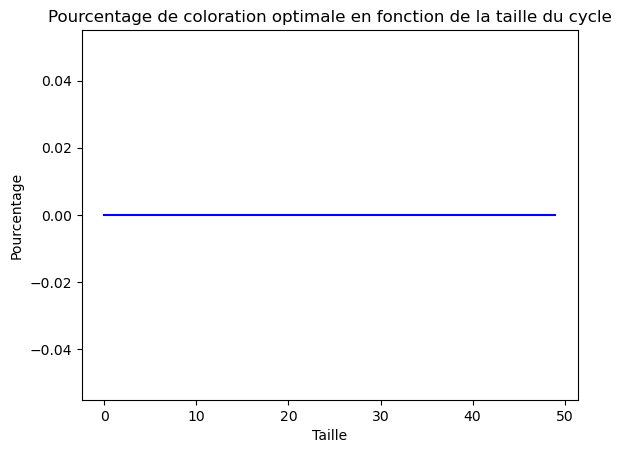

In [17]:
"""
Tracé courbe
"""
print(col_n)
plt.close()
plt.plot(col_n, color='blue')
plt.title('Pourcentage de coloration optimale en fonction de la taille du cycle')
plt.xlabel('Taille')
plt.ylabel('Pourcentage')

> <font color=darkorange> **_Question 7 :_** </font>
> Réaliser les mêmes tests statistiques sur des graphes différentes.

In [12]:
n=20
G=nx.algorithms.bipartite.generators.random_graph(n,n,.2)


A=nx.to_numpy_array(G)


C=NaiveCol(A)
print(C)

nx.draw(G, nodelist=range(2*n),node_color=C,with_labels=True,pos=nx.circular_layout(G))

In [13]:

n=25
t=100
col_count=np.zeros(n,int)

cols=np.zeros(t,int)


G=nx.algorithms.bipartite.generators.random_graph(n,n,.2)


A=nx.to_numpy_array(G)

for i in range(t):
    C=NaiveCol(A)
    c_max=max(C)+1
    cols[i]=c_max

print(col_count)
print(f'the colouring is optimal in {cols[2]/t:.5f} percent of the cases')
print(f'the mean number of colour is {np.mean(cols):.5f}')

plt.hist(cols,bins=np.arange(1,n+1))